## K Means Clustering Algorithm
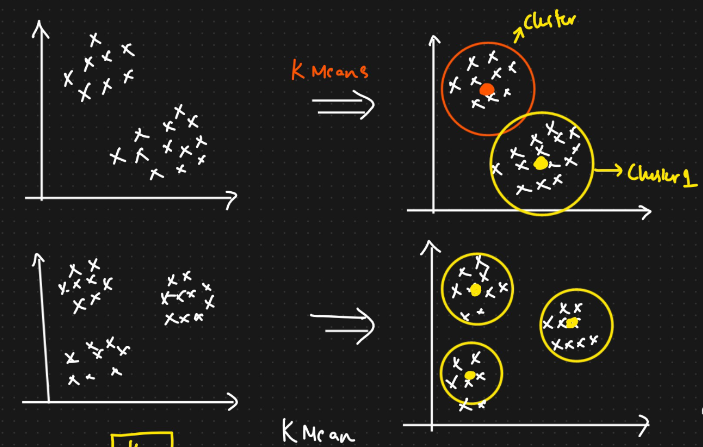

- After applying the K means clustering on dataset, will be getting different clusters with each cluster having "Centroids"
- Cluster the similar points together is the main aim behind K Means Clustering
- "Centroids basically means where will be our K value"
- K value means how many number of centroids will be having in the dataset

### How to create clusters
Steps:

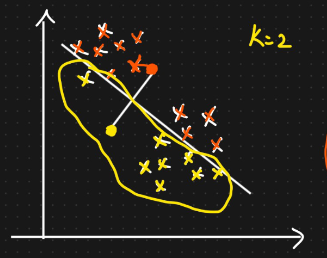

- Initialize some centroids and K value randomly, K value will be the number of centroids and centroids means the point where it will be
- Find out the distance of all the points with the each centroids
    - to find out the distance will be using "Eucledian or Manganttan distance"
    - Whichever point is near to whichever centroids will become part of that centroid or group
- Move the centroids -> find out the average of all the points in each group and whatever the average will become the new centroid for that group
- Repeat the step2 again find out the group and agin move the cnetroid, repeat util there is no change in the group

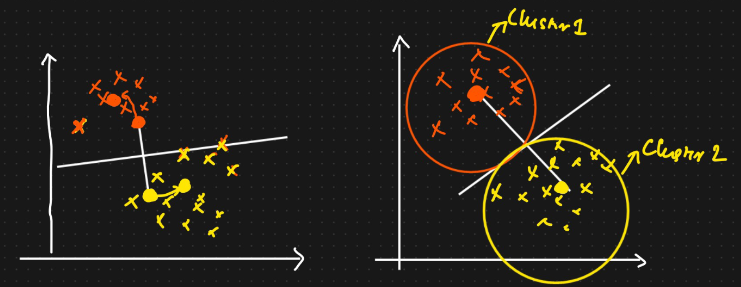

### How to select the K value
How many number of centroids will be there in the dataset

**WCSS -> Within Cluster Sum of Squares**

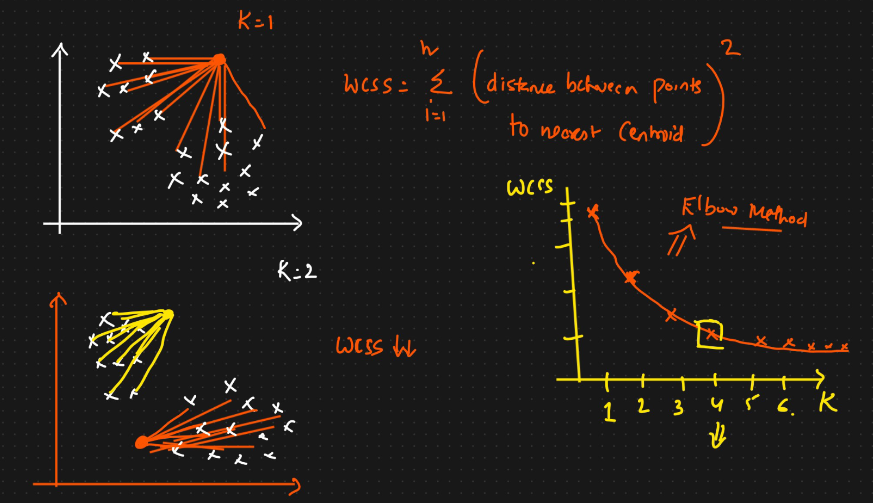

- to select the K value, initialize the K value to any range and check for each K value, suppose K=1 to 20
- find out the WCSS value, so as K value increases WCSS decreases and after some point WCSS value will become stable 
- "Elbow Method" says that we have to find out a point wherein there is an abrupt decrease in WCSS and then after that it is going to stabilize
- that point will be our K value

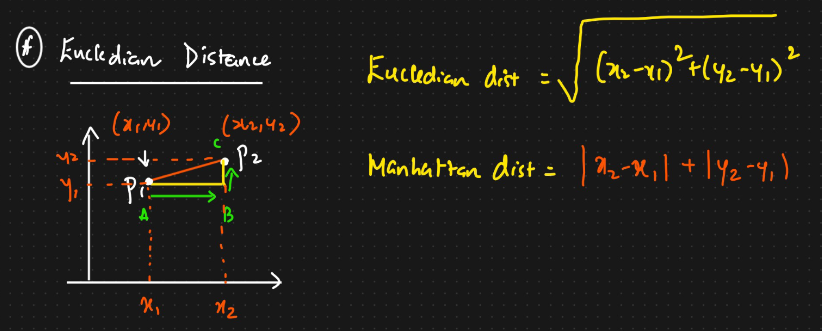

- P1 to P2 will be Eucledian distance, while AB to Bc will be Manhattan distance
- Air traffic like flights use Eucledian distance while road traffic like uber, ola uses Manhattan distance

### Random Initialization Trap -> K Means ++
- There is a problem in randomly initializing the centroids
- suppose, the expected clusters will be:

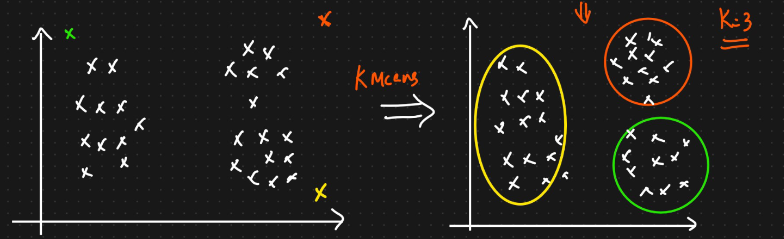

- but because we have randomly initialized the centroids, we got the cluster as:

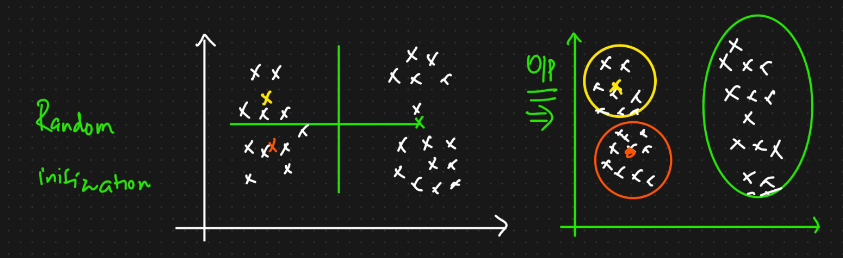

- To overcome this problem, we have a technique called **"K Means ++ Initialization Technique"**
- In this technique, what we do is we intialize all the centroids in such a way that atleast it should be at max distance it can be from the other centroids
- Initialize the centroids far away from each other
- It's not like every time in randome initialization will going to get the problem but it's better to use K Means ++

## Practical of K Means Clustering

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

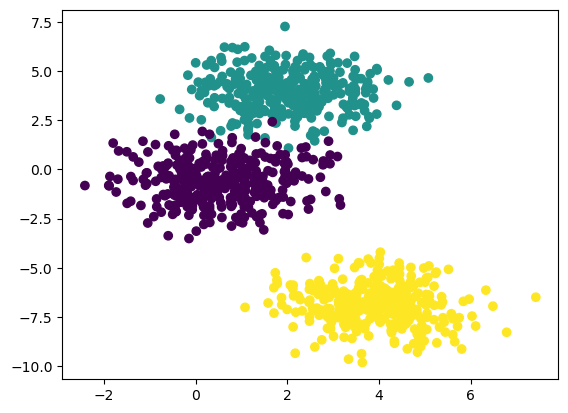

In [6]:
# plt.scatter(X[:,0],X[:,1])
plt.scatter(X[:,0],X[:,1],c=y)

here our aim is to find out the number of cluster which is basically the centers=3 in above code but in real world cases this center value will not be given

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

elblow method to select the K value

In [9]:
from sklearn.cluster import KMeans

wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)
print(wcss)

c:\Users\srish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\srish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\srish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\srish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

[1339.9999999999982, 469.93667744490006, 241.88891481226068, 197.4694988004146, 152.39590741970872, 142.06014470101724, 97.99227393451051, 87.64509374563704, 74.84430302125494, 68.58001104059382]


c:\Users\srish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\srish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


so here we can say that k=3 as we already seen above in the graph and center=3 is what we took

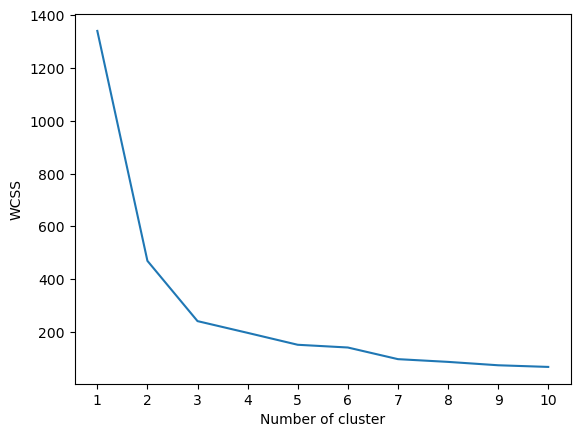

In [10]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()

In [11]:
kmeans=KMeans(n_clusters=3,init='k-means++')
kmeans.fit_predict(X_train_scaled)

c:\Users\srish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([0, 1, 0, 2, 2, 0, 0, 0, 2, 1, 1, 2, 1, 2, 0, 1, 0, 2, 1, 2, 2, 1,
       2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 0, 1, 0, 1, 2, 1, 0, 2, 1, 1, 2, 0,
       0, 0, 2, 2, 1, 1, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 2, 0,
       2, 2, 1, 2, 1, 0, 0, 2, 1, 2, 0, 1, 1, 1, 2, 2, 0, 1, 1, 2, 1, 0,
       2, 1, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 2, 2,
       2, 2, 1, 1, 0, 2, 1, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1,
       2, 1, 0, 2, 2, 1, 2, 2, 2, 2, 1, 0, 1, 2, 2, 0, 1, 0, 1, 1, 2, 2,
       2, 2, 1, 0, 0, 2, 1, 0, 1, 1, 0, 1, 2, 1, 0, 0, 2, 1, 0, 1, 0, 2,
       1, 2, 0, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1, 2, 0, 1, 2, 2, 0, 0, 1,
       1, 0, 0, 2, 0, 0, 1, 0, 0, 2, 2, 1, 2, 0, 1, 0, 2, 1, 2, 0, 0, 1,
       0, 1, 0, 2, 2, 2, 2, 0, 1, 2, 1, 2, 0, 1, 0, 1, 2, 2, 2, 1, 0, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 1, 1, 1, 2, 2, 0, 2, 2,
       2, 1, 0, 0, 1, 2, 1, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 0, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2,

In [13]:
y_pred=kmeans.predict(X_test_scaled)
y_pred

array([0, 1, 0, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 1, 2, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 2, 1, 2, 2, 1, 0, 1, 2,
       2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 0, 2, 1, 1, 1, 2, 0, 0, 2,
       1, 1, 2, 1, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 2, 0, 1, 2,
       1, 1, 2, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 0, 0, 2, 1, 1, 2, 0, 0, 1,
       1, 0, 0, 1, 2, 1, 2, 2, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 0, 2, 2, 1,
       1, 1, 1, 2, 0, 1, 1, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 1, 1, 1, 2, 2,
       1, 1, 2, 0, 1, 1, 2, 1, 0, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 1, 1, 1, 0, 1, 1,
       0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 0, 1, 2, 1, 2, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 2, 0, 2, 2, 1, 1, 0, 1, 1, 1, 1, 0, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 1,
       0, 1, 1, 0, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 0,

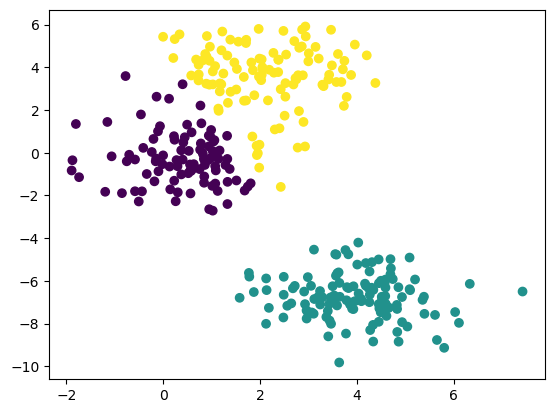

In [16]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

Validating the K value can be done by two more things:
- Kneelocator -> install !pip install kneed
- Silhoutee Scoring

In [20]:
from kneed import KneeLocator

kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
print(kl.elbow)


3


In [21]:
from sklearn.metrics import silhouette_score

silhouette_coeff=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coeff.append(score)
print(silhouette_coeff)

c:\Users\srish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\srish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\srish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\srish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

[0.6030225720131402, 0.5611317330493049, 0.49464738924058405, 0.4965564482657552, 0.45461389523252227, 0.4327794716768779, 0.4189360751482677, 0.3897585405376809, 0.37160500429991383]


c:\Users\srish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


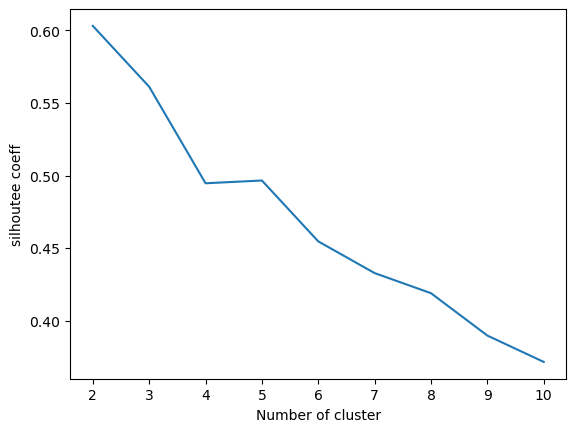

In [22]:
plt.plot(range(2,11),silhouette_coeff)
plt.xticks(range(2,11))
plt.xlabel("Number of cluster")
plt.ylabel("silhoutee coeff")
plt.show()